In this notebook, we can load directly the output of notebook 1. Here, we first do some QC and make plots to check the raw counts per cell, coverage per site etc. We then convert the raw counts to percentages, and the percentages to allele counts. Information is stored in several dataframes that can be used in downstream analyses such as the tree building. We only have to compute the dataframes once.

# Import all relevant packages

In [1]:
#import all 
%matplotlib inline
import matplotlib as mpl
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import scanpy as sc
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

/Users/m.blotenburg/miniconda3/envs/scanpy2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.4.1 scikit-learn==0.23.2 statsmodels==0.12.2 pynndescent==0.5.6


In [2]:
dpi = 50
sc.set_figure_params(dpi=dpi, color_map = 'viridis')


# Read in dataframe

In [3]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Setup_general/Posters/Poster sept 2018/'



In [4]:
df_n = pd.read_csv(pathToData + 'dataN.txt', sep = '\t')
df_n.head()

,Clone,Days,Fluorescence,Percent
0,3,9,Neongreen,6.54
1,3,4,Neongreen,1.00
2,3,3,Neongreen,1.11
3,3,2,Neongreen,2.49
4,3,1,Neongreen,17.28


In [5]:
df_s = pd.read_csv(pathToData + 'dataS.txt', sep = '\t')
df_s.head()

,Clone,Days,Fluorescence,Percent
0,3,9,Scarlet,12.01
1,3,4,Scarlet,6.41
2,3,3,Scarlet,3.24
3,3,2,Scarlet,1.16
4,3,1,Scarlet,0.28


In [6]:
df = pd.concat([df_s,df_n])
df['clone_f'] = 'Clone ' + df['Clone'].astype(str) + ', ' + df['Fluorescence'].astype(str)
df.head()

,Clone,Days,Fluorescence,Percent,clone_f
0,3,9,Scarlet,12.01,"Clone 3, Scarlet"
1,3,4,Scarlet,6.41,"Clone 3, Scarlet"
2,3,3,Scarlet,3.24,"Clone 3, Scarlet"
3,3,2,Scarlet,1.16,"Clone 3, Scarlet"
4,3,1,Scarlet,0.28,"Clone 3, Scarlet"


# plots

Plot fluorescence

In [7]:
df['days_f'] = df['Days'].astype(str) + '_' + df['Fluorescence'].astype(str)
df = df.reset_index()
df.head()

,index,Clone,Days,Fluorescence,Percent,clone_f,days_f
0,0,3,9,Scarlet,12.01,"Clone 3, Scarlet",9_Scarlet
1,1,3,4,Scarlet,6.41,"Clone 3, Scarlet",4_Scarlet
2,2,3,3,Scarlet,3.24,"Clone 3, Scarlet",3_Scarlet
3,3,3,2,Scarlet,1.16,"Clone 3, Scarlet",2_Scarlet
4,4,3,1,Scarlet,0.28,"Clone 3, Scarlet",1_Scarlet


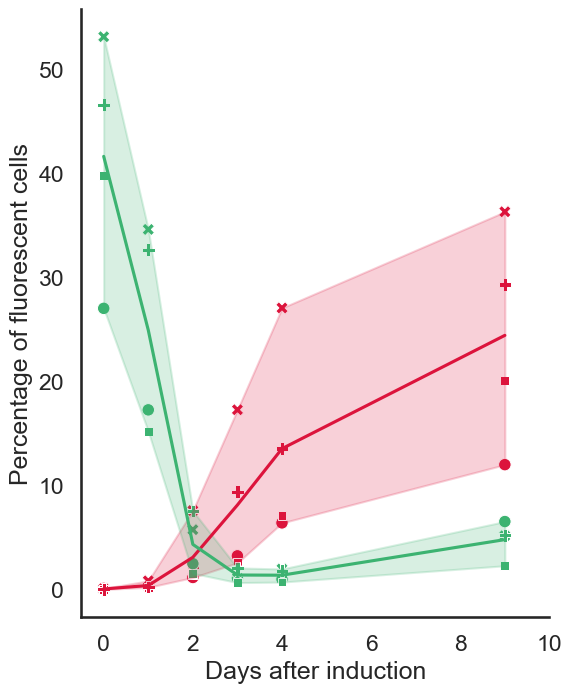

In [9]:
sns.set_context("talk")
sns.set_style("white")
fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)
cols = {'Neongreen':'mediumseagreen','Scarlet':'Crimson'}
sns.scatterplot(x = df['Days'], y = df['Percent'], ax=ax, hue = df['Fluorescence'],style = df['Clone'], #hue = df['clone_f'],
           palette = cols)
sns.lineplot(x=df['Days'], y=df['Percent'], hue = df['Fluorescence'], 
             palette = ['crimson','mediumseagreen'], ci= 100)
ax.set_xlim(-0.5,10)
ax.set_ylabel("Percentage of fluorescent cells")
ax.set_xlabel("Days after induction")
ax.legend([], frameon=False)

sns.despine()